# Tools to interpret, transform, and visualise the ultrasound data

Each utterance is represented as a tuple of four files:
* The prompt file: .txt
* The audio file: .wav
* The ultrasound file: .ult
* The parameter file: .param

In this notebook, we will only work with the ultrasound and parameter files. The ultrasound file is a sequence of ultrasound frames capturing the midsagittal view of the child’s tongue. The parameter file contains a set of parameters to interpret the ultrasound.

The first step is to point to the directory where the the sample utterance tuple is stored. 

In [1]:
import os

In [2]:
input_path = "input"

In [3]:
file = "sample"

In [4]:
param_filename = os.path.join(input_path, file + ".param")

In [5]:
ult_filename = os.path.join(input_path, file + ".ult")

## Parse the prompt file

In [6]:
from ustools.read_core_files import parse_parameter_file

In [7]:
param_df = parse_parameter_file(param_filename)

In [8]:
param_df

,NumVectors,PixPerVector,ZeroOffset,BitsPerPixel,Angle,Kind,PixelsPerMm,FramesPerSec,TimeInSecsOfFirstFrame
value,63.0,412.0,51.0,8.0,0.038,0.0,10.0,121.618,0.5073


In [9]:
param_df.loc["value"]

NumVectors                 63.0000
PixPerVector              412.0000
ZeroOffset                 51.0000
BitsPerPixel                8.0000
Angle                       0.0380
Kind                        0.0000
PixelsPerMm                10.0000
FramesPerSec              121.6180
TimeInSecsOfFirstFrame      0.5073
Name: value, dtype: float64

## Read the ultrasound file 

In [10]:
from ustools.read_core_files import read_ultrasound_file

In [11]:
ult = read_ultrasound_file(ult_filename)

In [12]:
ult.shape

(24087168,)

## Reshape the ultrasound 
The ultrasound is read as a 1D array. We need to transform it into a sequence of 2D arrays.

In [13]:
param_df['NumVectors'].value

63.0

In [14]:
param_df['PixPerVector'].value

412.0

In [15]:
ult_3d = ult.reshape(-1, int(param_df['NumVectors'].value), int(param_df['PixPerVector'].value))

In [16]:
ult_3d.shape  

(928, 63, 412)

In [17]:
print("The ultrasound file consists of %d frames" % ult_3d.shape[0])

The ultrasound file consists of 928 frames


In [18]:
ult_100th_frame = ult_3d[100] # get the 100th frame 

In [19]:
ult_100th_frame.shape

(63, 412)

## Visualise the ultrasound 

In [20]:
from ustools.visualise_ultrasound import display_2d_ultrasound_frame

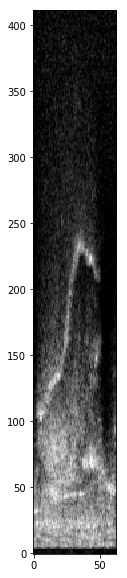

In [21]:
display_2d_ultrasound_frame(ult_100th_frame, dpi=None, figsize=(10,10))

## Transform ultrasound from raw to world proportions

In [22]:
from ustools.transform_ultrasound import transform_ultrasound

In [23]:
world_ult_100th_frame = transform_ultrasound(ult_100th_frame)

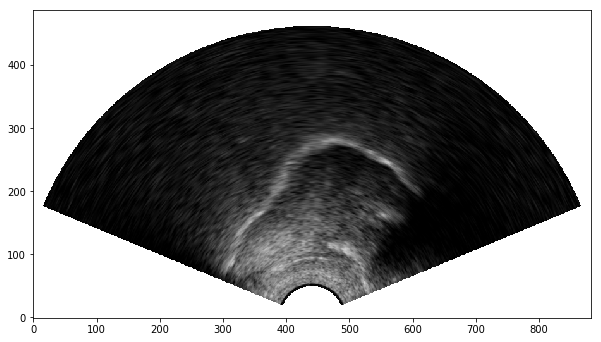

In [24]:
display_2d_ultrasound_frame(world_ult_100th_frame[0], dpi=None, figsize=(10,10))